# Color spectrum in images for 2020. In this part the whole world is considered. 

The source of high quality image data of phytoplancton distribution around the world in 2020: . Black color means that there is no data on the region. The detailed legend regarding meaning of the colours can be found in the section *The Chlorophyll Concentration color spectrum*




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
%matplotlib inline

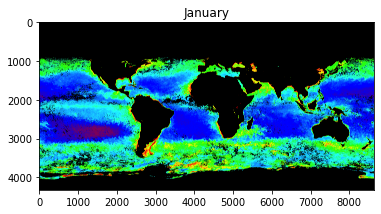

In [3]:
january = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/monthly/january.png')  
RGB_img = cv2.cvtColor(january, cv2.COLOR_BGR2RGB)
plt.title('January')
plt.imshow(january)
plt.imshow(RGB_img)

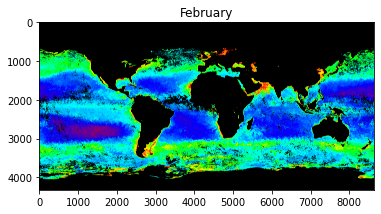

In [4]:
february = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/monthly/february.png')
RGB_img = cv2.cvtColor(february, cv2.COLOR_BGR2RGB)
plt.title('February')
plt.imshow(february)
plt.imshow(RGB_img)

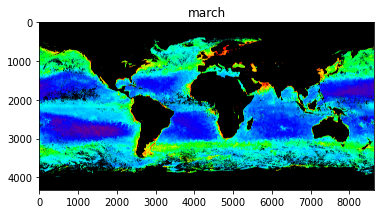

In [5]:
march = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/monthly/march.png')
RGB_img = cv2.cvtColor(march, cv2.COLOR_BGR2RGB)
plt.title('march')
plt.imshow(march)
plt.imshow(RGB_img)

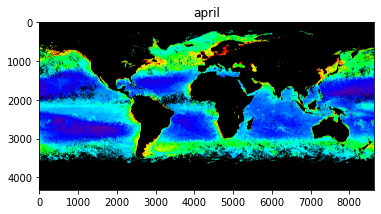

In [6]:
april = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/monthly/april.png')
RGB_img = cv2.cvtColor(april, cv2.COLOR_BGR2RGB)
plt.title('april')
plt.imshow(april)
plt.imshow(RGB_img)

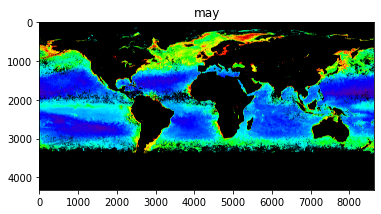

In [7]:
may = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/monthly/may.png')
RGB_img = cv2.cvtColor(may, cv2.COLOR_BGR2RGB)
plt.title('may')
plt.imshow(may)
plt.imshow(RGB_img)

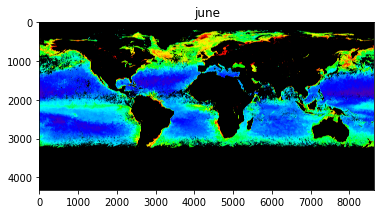

In [8]:
june = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/monthly/june.png')
RGB_img = cv2.cvtColor(june, cv2.COLOR_BGR2RGB)
plt.title('june')
plt.imshow(june)
plt.imshow(RGB_img)

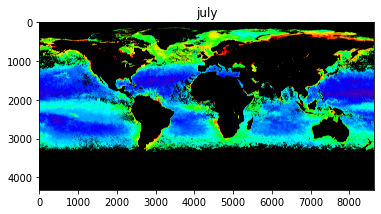

In [9]:
july = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/monthly/july.png')
RGB_img = cv2.cvtColor(july, cv2.COLOR_BGR2RGB)
plt.title('july')
plt.imshow(july)
plt.imshow(RGB_img)

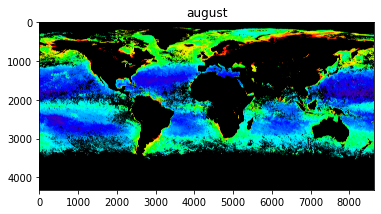

In [10]:
august = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/monthly/august.png')
RGB_img = cv2.cvtColor(august, cv2.COLOR_BGR2RGB)
plt.title('august')
plt.imshow(august)
plt.imshow(RGB_img)

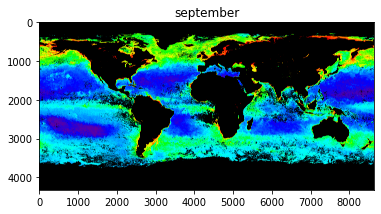

In [11]:
september = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/monthly/september.png')
RGB_img = cv2.cvtColor(september, cv2.COLOR_BGR2RGB)
plt.title('september')
plt.imshow(september)
plt.imshow(RGB_img)

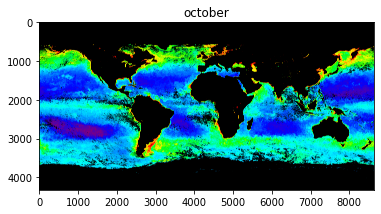

In [12]:
october = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/monthly/october.png')
RGB_img = cv2.cvtColor(october, cv2.COLOR_BGR2RGB)
plt.title('october')
plt.imshow(october)
plt.imshow(RGB_img)

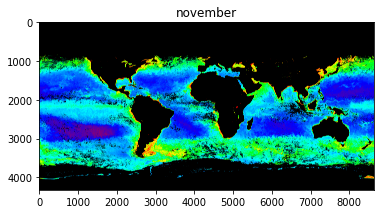

In [13]:
november = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/monthly/november.png')
RGB_img = cv2.cvtColor(november, cv2.COLOR_BGR2RGB)
plt.title('november')
plt.imshow(november)
plt.imshow(RGB_img)

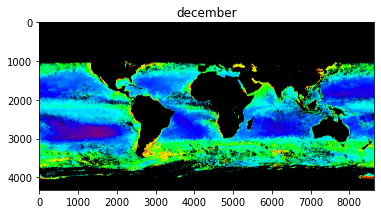

In [14]:
december = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/monthly/december.png')
RGB_img = cv2.cvtColor(december, cv2.COLOR_BGR2RGB)
plt.title('december')
plt.imshow(december)
plt.imshow(RGB_img)

# Functions for image processing

In [15]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [16]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Montly color spectrum analysis

dict_values([120167, 9803, 15966, 2177, 5154, 17821, 16103, 23206, 6426, 23177]) ['#437114', '#f1770d', '#f31204', '#ebdc1c', '#000100', '#8bee20', '#0ae9a9', '#0762c6', '#94092a', '#26f32f']
dict_values([116877, 11070, 15364, 3353, 27971, 13460, 19898, 5792, 20001, 6214]) ['#526604', '#2df10f', '#03ed7f', '#010100', '#95ee00', '#0086d6', '#f21a06', '#ef7a00', '#f0db00', '#a7043b']
dict_values([115991, 10738, 27866, 15442, 12000, 5459, 3577, 20224, 21024, 7679]) ['#010101', '#37f409', '#0097d6', '#5b6803', '#04f166', '#9ded00', '#f72003', '#f1dc00', '#c10230', '#f28200']
dict_values([127150, 9550, 12644, 16897, 18156, 10883, 5482, 2451, 17770, 19017]) ['#5b6302', '#0057b9', '#84ef01', '#01e5bd', '#ebe800', '#21f31c', '#f39d00', '#e30814', '#010100', '#fa4c00']
dict_values([137179, 8179, 15946, 14268, 10419, 9026, 6196, 3699, 17199, 17889]) ['#000100', '#00e5c3', '#4e6106', '#15f02c', '#f39c00', '#f85000', '#7ced01', '#005bd1', '#eae600', '#e80910']
dict_values([142334, 7594, 8904, 9843

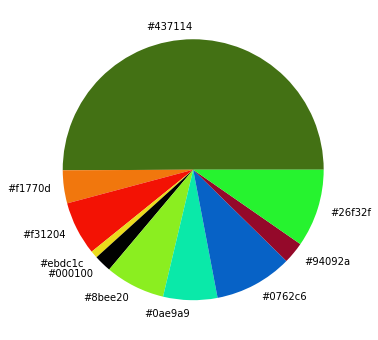

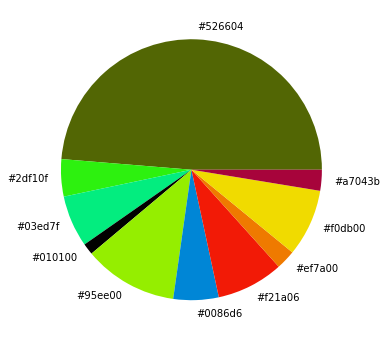

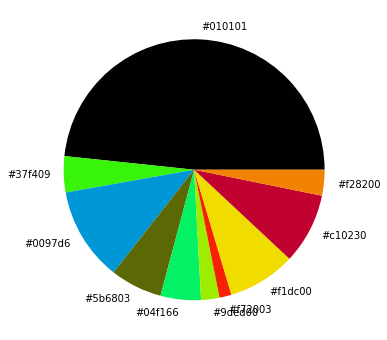

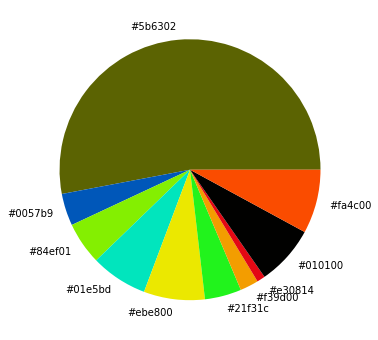

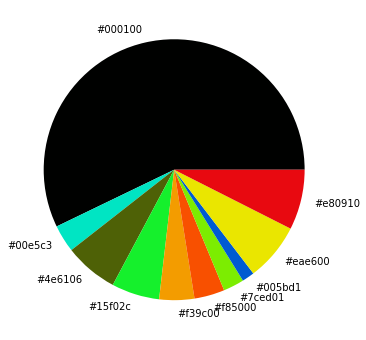

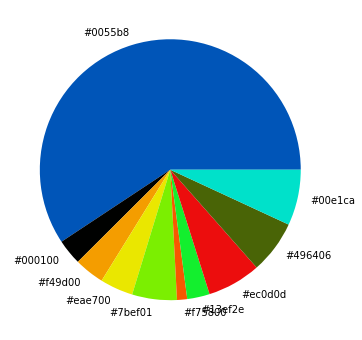

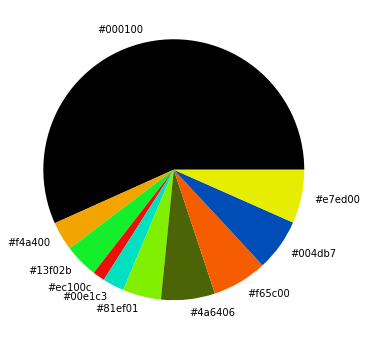

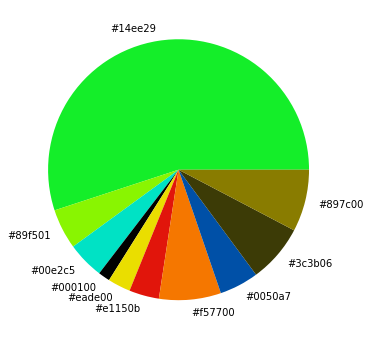

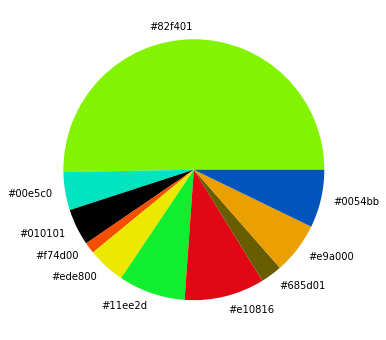

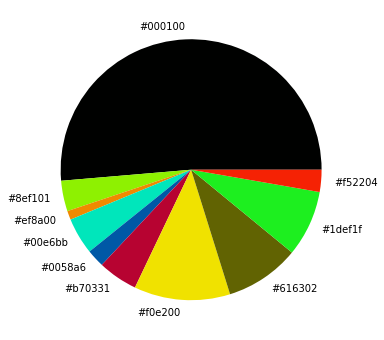

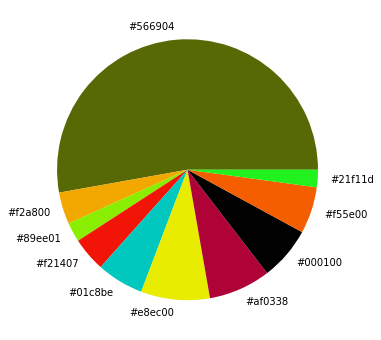

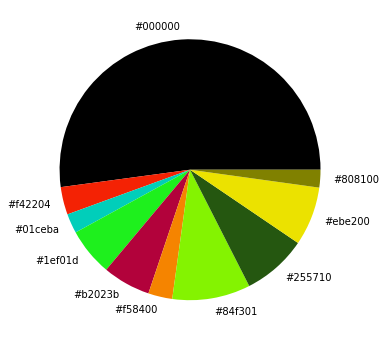

In [17]:
list_of_months = [january, february, march, april, may, june, july, august, september, october, november, december]

for image in list_of_months:
  modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

  clf = KMeans(n_clusters = 10)   #here you put the number of colors you want to detect
  labels = clf.fit_predict(modified_image)

  counts = Counter(labels)
  center_colors = clf.cluster_centers_

  # We get ordered colors by iterating through the keys
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]

  plt.figure(figsize = (8, 6))
  plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
  print(counts.values(), hex_colors)

# The Chlorophyll Concentration color spectrum

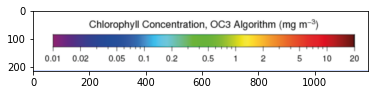

In [ ]:
image = cv2.imread('kolor.png')
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.imshow(RGB_img)

# Monthly Chlorophyll Concentrations calculation from the visual analysis

In [ ]:
dict_values([120415, 10228, 12460, 4179, 6517, 19535, 16149, 25485, 5309, 19723]) 
['#000100', '#f21e05', '#96ed01', '#a30340', '#00afd6', '#33f20d', '#4c6d06', '#f27d00', '#eede00', '#05ef6b']


...January...
___________________________
Hex values above 2 mg:
___________________________
#f21e05 (red) 10228
#a30340 (lila)  4179
#f27d00 (orange) 25485
#eede00 (yellow) 5309

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#96ed01 (green) 12460
#33f20d (green) 19535
#4c6d06 (dark green)  16149
#05ef6b (light green) 19723

____________________________
Hex values below 0.1 mg:
___________________________
#00afd6  6517


Black hex value:
#000100   120415

In [ ]:
dict_values([116852, 11040, 15407, 3255, 27892, 13221, 20001, 5672, 20367, 6293]) 
['#000100', '#f21c05', '#03ed83', '#0083d5', '#526504', '#f0dd00', '#ee7e00', '#a8043b', '#92ee00', '#2bf110']

... February...
___________________________
Hex values above 2 mg:
___________________________
#f21c05 (red) 11040
#f0dd00 (yellow) 13221
#ee7e00 (orange) 20001 
#a8043b (lila) 5672

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#03ed83 (green) 15407
#526504 (dark green) 27892
#92ee00 (green) 20367
#2bf110 (green) 6293

____________________________
Hex values below 0.1 mg:
___________________________
#0083d5 (blue) 3255


Black hex value:
#000100 116852

In [ ]:
dict_values([115999, 10735, 27752, 15441, 12147, 5314, 3469, 20083, 21107, 7953]) 
['#5b6803', '#04f16c', '#c2022f', '#010101', '#35f40a', '#9ded00', '#f82103', '#0092d6', '#f1dc00', '#f28400']

... March ...
___________________________
Hex values above 2 mg:
___________________________
#c2022f  (red) 27752
#f82103  (red) 3469
#f1dc00  (yellow) 21107
#f28400  (orange)  7953

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#5b6803 (green)  115999
#04f16c (green)  10735
#35f40a (green)  12147
#9ded00 (green)  5314 

____________________________
Hex values below 0.1 mg:
___________________________
#0092d6 (blue)   20083


Black hex value:
#000100  15441

In [ ]:
dict_values([127155, 9565, 12573, 16809, 17767, 10863, 5459, 2463, 17793, 19553]) 
['#010100', '#0058bb', '#21f31c', '#5b6202', '#e40913', '#eae900', '#84ef01', '#01e5bd', '#fa4f00', '#f2a000']

... April ...
___________________________
Hex values above 2 mg:
___________________________
#e40913 (red) 17767
#eae900 (yellow) 10863
#fa4f00 (orange) 17793
#f2a000 (orange) 19553

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#21f31c (green) 12573
#5b6202 (green) 16809
#84ef01 (green) 5459
#01e5bd (green) 2463


____________________________
Hex values below 0.1 mg:
___________________________
#0058bb (blue)  9565


Black hex value:
#000100  127155

In [ ]:
dict_values([137186, 8185, 15946, 14267, 10407, 9025, 6197, 3699, 17197, 17891]) 
['#000100', '#005bd1', '#f85000', '#4e6106', '#00e5c3', '#eae600', '#e80910', '#7ded01', '#15f02c', '#f39c00']


... May ...
___________________________
Hex values above 2 mg:
___________________________
#f85000 (orange) 15946
#eae600 (yellow) 9025
#e80910 (red) 6197
#f39c00 (orange) 17891

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#4e6106 (green) 14267
#00e5c3 (light green) 10407
#7ded01 (green) 3699
#15f02c (green) 17197

____________________________
Hex values below 0.1 mg:
___________________________
#005bd1 (blue) 8185

Black hex value:
#000100 137186



In [ ]:
dict_values([142353, 7573, 8915, 9856, 13694, 3026, 6693, 16179, 15601, 16110]) 
['#000100', '#f75500', '#ebe500', '#0054b5', '#13ee2f', '#7bef01', '#00e0cb', '#f49b00', '#4a6406', '#eb0d0d']

... June ...
___________________________
Hex values above 2 mg:
___________________________
#f75500 (orange) 7573
#ebe500 (yellow) 8915
#f49b00 (orange) 16179
#eb0d0d (red) 16110

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#13ee2f (green) 13694
#7bef01 (green) 3026
#00e0cb (light green)  6693
#4a6406 (green) 15601

____________________________
Hex values below 0.1 mg:
___________________________
#0054b5 (blue) 9856

Black hex value:
#000100  142353

In [ ]:
dict_values([136167, 8594, 10123, 3595, 6499, 11404, 15865, 16162, 15517, 16074]) 
['#4b6506', '#e8ec00', '#83ef01', '#f65d00', '#004eb7', '#000100', '#00e2c1', '#f4a400', '#ec100c', '#14f02a']

... July ...
___________________________
Hex values above 2 mg:
___________________________
#e8ec00 (yellow) 8594
#f65d00 (orange) 3595
#f4a400 (orange) 16162
#ec100c (red)  15517

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#4b6506 (green) 136167
#83ef01 (green) 10123
#00e2c1 (green) 15865
#14f02a (green) 16074

____________________________
Hex values below 0.1 mg:
___________________________
#004eb7 (blue) 6499

Black hex value:
#000100   11404

In [ ]:
dict_values([132268, 12066, 10949, 3515, 6756, 8765, 18588, 11592, 17181, 18320]) 
['#00e1c5', '#f67600', '#8b7e00', '#3e3c05', '#000100', '#14ee29', '#eadd00', '#88f501', '#e1150b', '#0050a6']

... August ...
___________________________
Hex values above 2 mg:
___________________________
#f67600 (orange) 12066
#eadd00 (yellow) 18588
#e1150b (red) 17181

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#00e1c5 (green) 132268
#8b7e00 (green) 10949
#3e3c05 (dark green) 3515
#14ee29 (green) 8765
#88f501 (green) 11592

____________________________
Hex values below 0.1 mg:
___________________________
#0050a6 (blue) 18320

Black hex value:
#000100  6756

In [ ]:

dict_values([120666, 11409, 10951, 3364, 11182, 19732, 24193, 6494, 15187, 16822]) 
['#010101', '#86f401', '#e00716', '#eee600', '#f84a00', '#675d01', '#e89d00', '#0056bd', '#00e7bc', '#13ee2a']

... September ...
___________________________
Hex values above 2 mg:
___________________________
#e00716 (red) 10951
#f84a00 (red) 11182
#e89d00 (orange) 24193
___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#86f401 (green) 11409
#eee600 (yellow) 3364
#675d01 (green) 19732
#00e7bc (green) 15187
#13ee2a (green)  16822
____________________________
Hex values below 0.1 mg:
___________________________
#0056bd (blue) 6494

Black hex value:
#000100   120666

In [ ]:
dict_values([123244, 9085, 2661, 10958, 5307, 11832, 28476, 22173, 19817, 6447]) 
['#000100', '#8ff101', '#ef8a00', '#b60332', '#0059a7', '#00e6ba', '#f0e200', '#616302', '#1def1f', '#f52204']

... October ...
___________________________
Hex values above 2 mg:
___________________________
#ef8a00 (orange) 2661
#b60332 (red) 10958
#f0e200 (yellow) 28476
#f52204 (red) 6447
___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#8ff101 (green) 9085
#00e6ba (green) 11832
#616302 (green) 22173
#1def1f (green) 19817
 

____________________________
Hex values below 0.1 mg:
___________________________
#0059a7 (blue) 5307

Black hex value:
#000100   123244

In [ ]:
dict_values([125041, 7251, 5665, 10719, 6926, 13508, 24490, 20364, 19146, 6890]) 
['#31520e', '#ede200', '#8d8700', '#01cbbf', '#ba0331', '#f72903', '#24f11b', '#000000', '#f78b00', '#90f401']

... November ...
___________________________
Hex values above 2 mg:
___________________________
#ede200 (yellow) 7251
#ba0331 (red) 6926
#f72903 (red) 13508
#f78b00 (orange) 19146

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#31520e (green) 125041
#8d8700 (green) 5665
#24f11b (green) 24490
#90f401 (green) 6890


____________________________
Hex values below 0.1 mg:
___________________________
#01cbbf (blue) 10719


Black hex value:
#000100  
#000000  20364

In [ ]:
dict_values([125235, 8192, 5815, 14159, 14251, 7080, 23243, 19092, 17575, 5358]) 
['#255a10', '#817f00', '#1ef01d', '#f42304', '#000000', '#f58500', '#ebe200', '#84f201', '#b3023b', '#01ceba']

... December ...
___________________________
Hex values above 2 mg:
___________________________
#f42304 (red) 14159
#f58500 (orange) 7080
#ebe200 (yellow) 23243
#b3023b (red) 17575

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#255a10 (green) 125235 
#817f00 (green) 8192
#1ef01d (green) 5815
#84f201 (green) 19092
#01ceba (green) 5358


____________________________
Hex values below 0.1 mg:
___________________________


Black hex value:
#000000   14251

# Selecting a region centered around the Lost City hydrothermal field above the equator

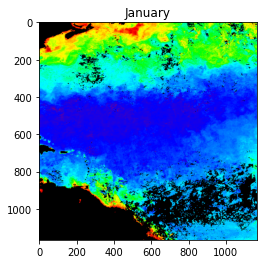

In [18]:
january_crop = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/cropped/april_crop.png')
RGB_img = cv2.cvtColor(january_crop, cv2.COLOR_BGR2RGB)
plt.title('January')
plt.imshow(january_crop)
plt.imshow(RGB_img)

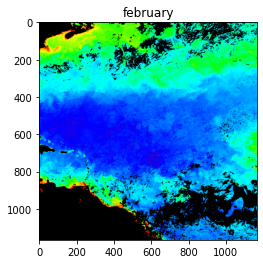

In [19]:
february_crop = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/cropped/february_crop.png')
RGB_img = cv2.cvtColor(february_crop, cv2.COLOR_BGR2RGB)
plt.title('february')
plt.imshow(february_crop)
plt.imshow(RGB_img)

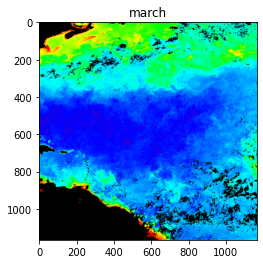

In [20]:
march_crop = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/cropped/march_crop.png')
RGB_img = cv2.cvtColor(march_crop, cv2.COLOR_BGR2RGB)
plt.title('march')
plt.imshow(march_crop)
plt.imshow(RGB_img)

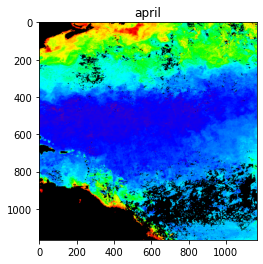

In [21]:
april_crop = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/cropped/april_crop.png')
RGB_img = cv2.cvtColor(april_crop, cv2.COLOR_BGR2RGB)
plt.title('april')
plt.imshow(april_crop)
plt.imshow(RGB_img)

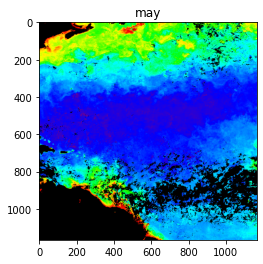

In [22]:
may_crop = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/cropped/may_crop.png')
RGB_img = cv2.cvtColor(may_crop, cv2.COLOR_BGR2RGB)
plt.title('may')
plt.imshow(may_crop)
plt.imshow(RGB_img)

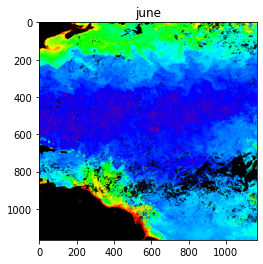

In [23]:
june_crop = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/cropped/june_crop.png')
RGB_img = cv2.cvtColor(june_crop, cv2.COLOR_BGR2RGB)
plt.title('june')
plt.imshow(june_crop)
plt.imshow(RGB_img)

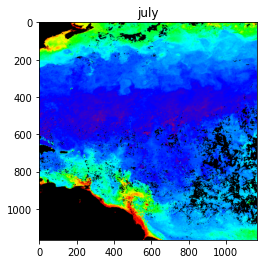

In [24]:
july_crop = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/cropped/july_crop.png')
RGB_img = cv2.cvtColor(july_crop, cv2.COLOR_BGR2RGB)
plt.title('july')
plt.imshow(july_crop)
plt.imshow(RGB_img)

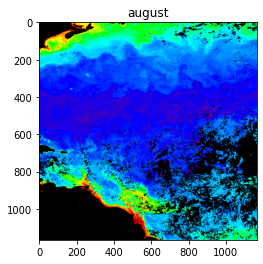

In [25]:
august_crop = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/cropped/august_crop.png')
RGB_img = cv2.cvtColor(august_crop, cv2.COLOR_BGR2RGB)
plt.title('august')
plt.imshow(august_crop)
plt.imshow(RGB_img)

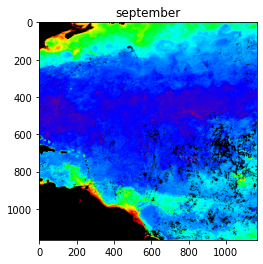

In [26]:
september_crop = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/cropped/september_crop.png')
RGB_img = cv2.cvtColor(september_crop, cv2.COLOR_BGR2RGB)
plt.title('september')
plt.imshow(september_crop)
plt.imshow(RGB_img)

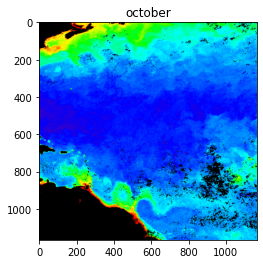

In [27]:
october_crop = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/cropped/october_crop.png')
RGB_img = cv2.cvtColor(october_crop, cv2.COLOR_BGR2RGB)
plt.title('october')
plt.imshow(october_crop)
plt.imshow(RGB_img)

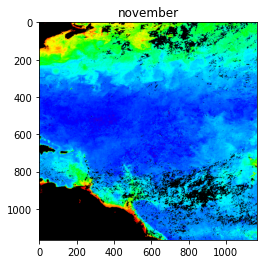

In [28]:
november_crop = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/cropped/november_crop.png')
RGB_img = cv2.cvtColor(november_crop, cv2.COLOR_BGR2RGB)
plt.title('november')
plt.imshow(november_crop)
plt.imshow(RGB_img)

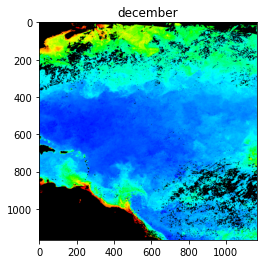

In [29]:
december_crop = cv2.imread('/content/drive/MyDrive/Simpsons-faces/monthly/NS111/cropped/december_crop.png')
RGB_img = cv2.cvtColor(december_crop, cv2.COLOR_BGR2RGB)
plt.title('december')
plt.imshow(december_crop)
plt.imshow(RGB_img)

dict_values([46761, 3485, 13481, 16545, 13708, 20820, 8785, 28448, 30649, 57318]) ['#0050ec', '#6f5a00', '#00ecd9', '#f3090b', '#72f900', '#e6f100', '#fc5b00', '#030301', '#f9a700', '#0bfa31']
dict_values([53029, 8136, 3360, 11774, 19896, 9932, 33237, 32912, 34229, 33495]) ['#fba500', '#f3ee00', '#fa1403', '#38fa04', '#020301', '#00fc64', '#fc5f00', '#6b5e00', '#00bbe1', '#a0f800']
dict_values([35310, 2144, 8585, 13180, 21735, 7972, 32218, 43715, 29900, 45241]) ['#006be3', '#00f8b2', '#f0ec00', '#766200', '#15fc20', '#fba200', '#fa1003', '#030301', '#fc5b00', '#8dfa00']
dict_values([46760, 3485, 13476, 16550, 13714, 21071, 8789, 28554, 30679, 56922]) ['#030301', '#6f5a00', '#0bfa31', '#e7f100', '#f3090b', '#f9a600', '#004fec', '#72f900', '#fc5a00', '#00ecd9']
dict_values([47382, 3053, 13377, 13908, 8725, 13270, 25404, 31710, 26863, 56308]) ['#00f8bb', '#734a01', '#f2e500', '#030301', '#ec0411', '#f99800', '#83f800', '#0054df', '#fc4300', '#0ef82d']
dict_values([37969, 2277, 6616, 14899

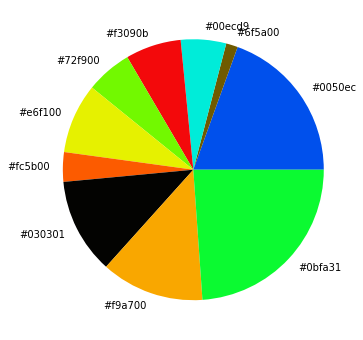

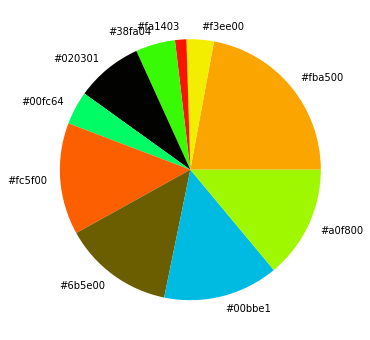

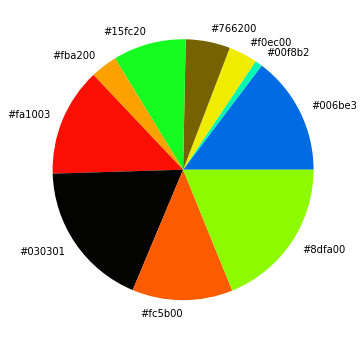

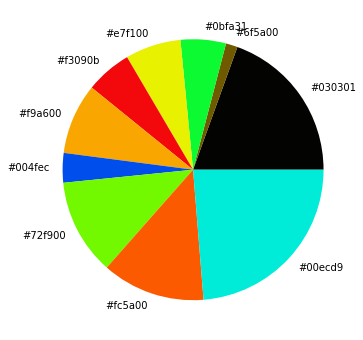

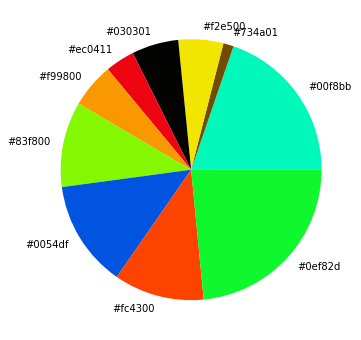

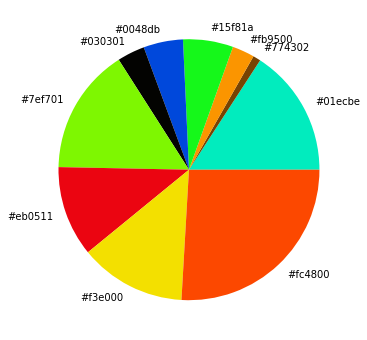

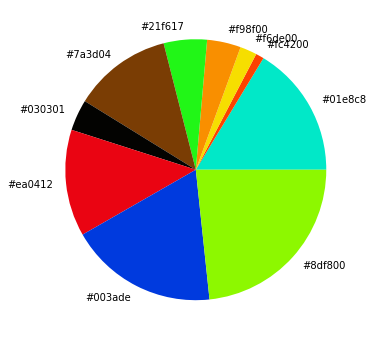

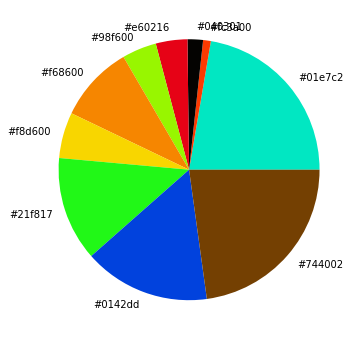

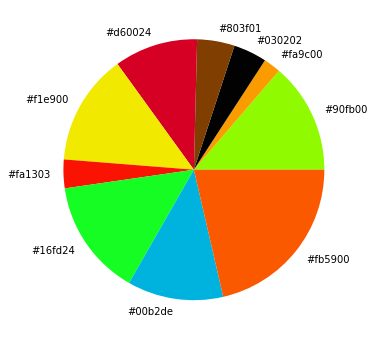

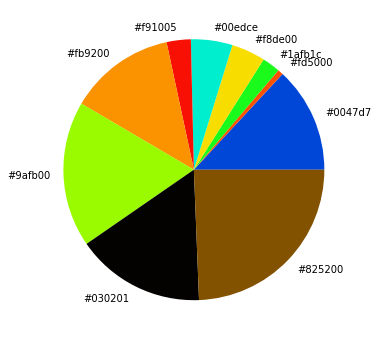

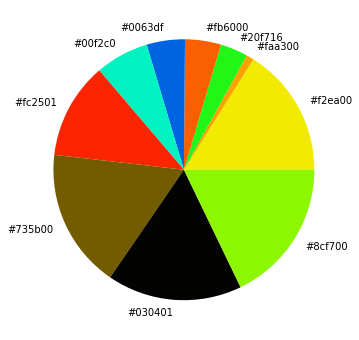

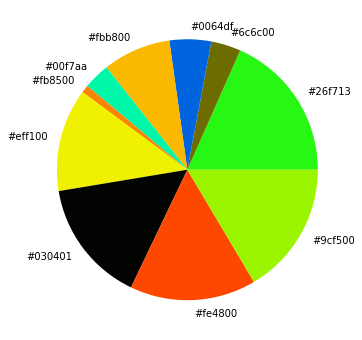

In [30]:
list_of_months = [january_crop, february_crop, march_crop, april_crop, may_crop, june_crop, july_crop, august_crop, september_crop, october_crop, november_crop, december_crop]

for image in list_of_months:
  modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

  clf = KMeans(n_clusters = 10)   #here you put the number of colors you want to detect
  labels = clf.fit_predict(modified_image)

  counts = Counter(labels)
  center_colors = clf.cluster_centers_

  # We get ordered colors by iterating through the keys
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]

  plt.figure(figsize = (8, 6))
  plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
  print(counts.values(), hex_colors)

# Monthly Chlorophyll Concentrations calculation in the croped region 

In [ ]:
dict_values([45314, 1897, 5182, 13039, 26041, 9749, 35605, 32395, 38036, 32742]) 
['#1bfa39', '#f0ed1e', '#67630d', '#fc5d09', '#09f0c3', '#030301', '#faa113', '#0649d4', '#fd1800', '#93f921']

... January ...
___________________________
Hex values above 2 mg:
___________________________
#f0ed1e (yellow) 1897
#67630d (brown) 5182
#fc5d09 (red) 13039
#faa113 (orange) 35605
#fd1800 (red) 38036

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#1bfa39 (green) 45314
#09f0c3 (green) 26041
#93f921 (green) 32742

____________________________
Hex values below 0.1 mg:
___________________________
#0649d4 (blue) 32395

Black hex value:
#030301  9749

In [ ]:
dict_values([53072, 8205, 3477, 11953, 19740, 9953, 32994, 32474, 34284, 33848]) 
['#020301', '#00bfdf', '#fa1403', '#a2f800', '#6b5e00', '#fba600', '#fc6000', '#00fc60', '#f3ee00', '#3bfa03']

... February ...
___________________________
Hex values above 2 mg:
___________________________
#fa1403 (red) 3477
#fba600 (orange) 9953
#fc6000 (red) 32994
#f3ee00 (yellow) 34284

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#a2f800 (green) 11953
#6b5e00 (green) 19740
#00fc60 (green) 32474
#3bfa03 (green) 33848

____________________________
Hex values below 0.1 mg:
___________________________
#00bfdf (blue) 8205

Black hex value:
#020301   53072

In [ ]:
dict_values([35305, 2144, 8585, 13172, 21559, 7971, 31587, 42469, 30781, 46427]) 
['#766200', '#fc5f00', '#15fc20', '#8dfa00', '#fba400', '#006be3', '#030301', '#fa1103', '#f0ed00', '#00f8b2']

... March ...
___________________________
Hex values above 2 mg:
___________________________
#766200 (brown) 35305
#fc5f00 (orange) 2144
#fba400 (orange) 21559
#fa1103 (red) 42469
#f0ed00 (yellow) 30781

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#15fc20 (green) 8585
#8dfa00 (green) 13172
#00f8b2 (green) 46427

____________________________
Hex values below 0.1 mg:
___________________________
#006be3 (blue) 7971

Black hex value:
#030301  31587

In [ ]:
dict_values([46755, 3485, 13476, 16550, 13717, 21062, 8776, 28219, 30642, 57318]) 
['#004fec', '#6f5900', '#00ecd9', '#f9a600', '#e7f100', '#f3090b', '#fc5b00', '#030301', '#72f900', '#0bfa31']

... April ...
___________________________
Hex values above 2 mg:
___________________________
#6f5900 (brown) 3485
#f9a600 (orange) 16550
#e7f100 (yellow) 13717
#f3090b (red) 21062
#fc5b00 (orange) 8776
___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#00ecd9 (green) 13476
#72f900 (green) 30642
#0bfa31 (green) 57318

____________________________
Hex values below 0.1 mg:
___________________________
#004fec (blue) 46755

Black hex value:
#030301  28219

In [ ]:
dict_values([47379, 3053, 13377, 13908, 8728, 13270, 25404, 31710, 26863, 56308]) 
['#0054df', '#83f800', '#0ef82d', '#f99800', '#ec0411', '#734a01', '#00f8bb', '#fc4300', '#030301', '#f2e500']


... May ...
___________________________
Hex values above 2 mg:
___________________________
#f99800 (orange) 13908
#ec0411 (red) 8728
#734a01 (brown) 13270
#fc4300 (red) 31710
#f2e500 (yellow) 56308

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#83f800 (green) 3053
#0ef82d (green) 13377
#00f8bb (green)  25404

____________________________
Hex values below 0.1 mg:
___________________________
#0054df (blue) 47379

Black hex value:
#030301 26863

In [ ]:
dict_values([37946, 2262, 6541, 14529, 11947, 8199, 37368, 25940, 32158, 63110]) 
['#774302', '#eb0611', '#7af801', '#f2e300', '#14f81b', '#0047db', '#01ecbf', '#fc4b00', '#fb9800', '#030301']

... June ...
___________________________
Hex values above 2 mg:
___________________________
#774302 (brown) 37946
#eb0611 (red) 2262
#f2e300 (yellow) 14529
#fc4b00 (red) 25940
#fb9800 (orange) 32158

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#7af801 (green) 6541
#14f81b (green) 11947
#01ecbf (green) 37368

____________________________
Hex values below 0.1 mg:
___________________________
#0047db (blue) 8199

Black hex value:
#030301  63110

In [ ]:
dict_values([39156, 2407, 4971, 10018, 13189, 30767, 9255, 32503, 43691, 54043]) 
['#030301', '#fc3e00', '#8ef800', '#e90413', '#01e7c9', '#f6db00', '#793d03', '#0039de', '#f98900', '#20f618']

... July ...
___________________________
Hex values above 2 mg:
___________________________
#fc3e00 (red) 2407
#e90413 (red) 10018
#f6db00 (yeallow) 30767
#793d03 (brown) 9255 
#f98900 (orange) 43691

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#8ef800 (green)  4971
#01e7c9 (green) 13189
#20f618 (green) 54043

____________________________
Hex values below 0.1 mg:
___________________________
#0039de (blue) 32503

Black hex value:
#030301 (black) 39156 

In [ ]:
dict_values([53572, 2299, 4601, 9520, 10311, 22901, 13655, 30773, 37597, 54771]) 
['#0142dd', '#744002', '#21f816', '#fc3a00', '#e60216', '#01e7c2', '#f8d500', '#f68600', '#040301', '#9af600']

... August ...
___________________________
Hex values above 2 mg:
___________________________
#744002 (brown) 2299
#fc3a00 (red) 9520
#e60216 (red) 10311
#f8d500 (yellow) 13655
#f68600 (orange) 30773

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#21f816 (green) 4601
#01e7c2 (green) 22901
#9af600 (green) 54771

____________________________
Hex values below 0.1 mg:
___________________________
#0142dd (blue) 53572

Black hex value:
#040301   37597 

In [ ]:
dict_values([32862, 5041, 9752, 10935, 25664, 33728, 8508, 34741, 27688, 51081]) 
['#8cfb00', '#f0e900', '#803f01', '#030202', '#fa9b00', '#14fd26', '#f91203', '#d50025', '#00b0df', '#fb5700']

... September ...
___________________________
Hex values above 2 mg:
___________________________
#f0e900 (yellow) 5041
#803f01 (brown) 9752
#fa9b00 (orange) 25664
#f91203 (red) 8508
#d50025 (red) 27688
#fb5700 (orange) 51081

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#8cfb00 (green) 32862
#14fd26 (green) 33728

____________________________
Hex values below 0.1 mg:
___________________________


Black hex value:
#030202    10935

In [ ]:
dict_values([31460, 1611, 5312, 9901, 12021, 7179, 29827, 42832, 39561, 60296]) 
['#0045d6', '#f91104', '#fb9700', '#18fb1d', '#825200', '#fd5400', '#00ecd0', '#95fb00', '#030201', '#f6e200']

... October ...
___________________________
Hex values above 2 mg:
___________________________
#f91104 (red) 1611
#fb9700 (orange) 5312
#825200 (brown) 12021
#fd5400 (red) 7179
#f6e200 (yellow) 60296

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#18fb1d (green) 9901
#95fb00 (green) 42832

____________________________
Hex values below 0.1 mg:
___________________________
#0045d6 (blue) 31460
#00ecd0 (blue) 29827

Black hex value:
#030201 39561

In [ ]:
dict_values([38542, 2253, 8202, 10679, 11368, 16027, 29809, 42370, 40373, 40377]) 
['#00f2c0', '#fb5c00', '#20f716', '#fc2301', '#f3e900', '#030401', '#735b00', '#faa000', '#0063df', '#8df700']

... November ...
___________________________
Hex values above 2 mg:
___________________________
#fb5c00 (red) 2253
#fc2301 (red) 10679
#f3e900 (yellow) 11368
#735b00 (brown) 29809
#faa000 (orange) 42370
___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#00f2c0 (green) 38542
#20f716 (green) 8202
#8df700 (green) 40377

____________________________
Hex values below 0.1 mg:
___________________________
#0063df (blue)40373

Black hex value:
#030401  16027

In [ ]:
dict_values([44147, 8945, 12367, 7841, 2308, 20351, 31355, 37844, 37076, 37766]) 
['#00f7aa', '#9df500', '#27f713', '#fc8200', '#0065df', '#f0f100', '#fe4700', '#6d6c00', '#fbb600', '#030401']
... December ...
___________________________
Hex values above 2 mg:
___________________________
#fc8200 (orange) 7841
#f0f100 (yellow) 20351
#fe4700 (red) 31355
#fbb600 (orange) 37076

___________________________
Hex values in 0.1 to 2 mg range:
___________________________
#00f7aa (green) 44147
#9df500 (green) 8945
#27f713 (green) 12367
#6d6c00 (green) 37844

____________________________
Hex values below 0.1 mg:
___________________________
#0065df (blue) 2308

Black hex value:
#030401    37766

# Visualization with the Nightingale's chart

In [32]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_excel('/content/nightingale-data.xlsx', sheet_name='phytoplankton')


In [33]:
data.describe()

,Total (missing values and ),Chlorophyll Concentration above 2 mg m3,0.1-2mg m 3,below 0.1,region above 2mg,region 0.1-2mg,region below 0.1
count,2.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,240000.0,51223.916667,100368.833333,8733.333333,98085.416667,77803.750000,28412.250000
std,0.0,7271.978216,56831.903586,5719.636850,22525.153118,21466.750794,21969.096709
min,240000.0,43868.000000,37304.000000,0.000000,63590.000000,41834.000000,0.000000
25%,240000.0,46704.750000,58572.750000,6197.250000,84991.250000,63906.500000,8142.000000
50%,240000.0,48659.500000,68913.000000,7351.000000,96308.500000,77238.000000,32449.000000
75%,240000.0,52520.750000,162487.500000,10071.750000,115607.250000,98870.250000,46911.000000
max,240000.0,65976.000000,178229.000000,20083.000000,132258.000000,104097.000000,61287.000000


In [34]:
data.head(12)
#data = data[:,:3]

,Month,Total (missing values and ),Chlorophyll Concentration above 2 mg m3,0.1-2mg m 3,below 0.1,region above 2mg,region 0.1-2mg,region below 0.1
0,January,240000.0,45201,67867,6517,93759,104097,32395
1,February,240000.0,49934,69959,3255,80708,98015,8205
2,March,NaN,60281,144195,20083,132258,68184,7971
3,April,NaN,65976,37304,9565,63590,101436,46755
4,May,NaN,49059,45570,8185,123924,41834,47379
5,June,NaN,48777,39014,9856,112835,55856,8199
6,July,NaN,43868,178229,6499,96138,72203,32503
7,August,NaN,47835,167089,18320,66558,82273,53572
8,September,NaN,46326,66514,6494,127734,66590,0
9,October,NaN,48542,62907,5307,86419,52733,61287


# This is the graph for global dta 

In [38]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Barpolar(
    r= data['0.1-2mg m 3'].tolist(),
    name='0.1-2 mg^3',
    marker_color='rgb(103, 179, 50)',
    base = 'stack',
    theta = data['Month']
))
fig.add_trace(go.Barpolar(
    r= data['Chlorophyll Concentration above 2 mg m3'].tolist(),
    name='above 2mg^-3',
    marker_color='rgb(227, 33, 35)',
    base = 'stack',
    theta = data['Month']
))

fig.add_trace(go.Barpolar(
    r= data['below 0.1'].tolist(),
    name='below 0.1',
    marker_color='rgb(37, 81, 157)',
    base = 'stack',
    theta = data['Month']
 ))






fig.update_traces(text= data['Month'].tolist())
fig.update_layout(
    title='Chlorophyll Concentration (mg m-3)',
    font_size=12,
    legend_font_size=18,
    template = 'plotly_dark',
    polar = dict(
        radialaxis = dict(range=[0, 180000], showticklabels=True, ticks='', visible= True),
        angularaxis = dict( showticklabels=True, showgrid=True, showline=True)
    ),
    bargroupgap=0
    #showgrid=False
    

)


fig.show(config={'scrollZoom': True})


#fig.write_image("RoseChart.png", height=500, width=900)

# This is the graph for the croped region

In [39]:
import plotly.graph_objects as go
fig = go.Figure()


fig.add_trace(go.Barpolar(
    r= data['region above 2mg'].tolist(),
    name='above 2mg',
    marker_color='rgb(227, 33, 35)',
    base = 'stack',
    theta = data['Month']
))


fig.add_trace(go.Barpolar(
    r= data['region 0.1-2mg'].tolist(),
    name='below 0.1',
    marker_color='rgb(103, 179, 50)',
    base = 'stack',
    theta = data['Month']
 ))

fig.add_trace(go.Barpolar(
    r= data['region below 0.1'].tolist(),
    name='below 0.1',
    marker_color='rgb(37, 81, 157)',
    base = 'stack',
    theta = data['Month']
 ))



fig.update_traces(text= data['Month'].tolist())
fig.update_layout(
    title='Nightingale Rose Chart',
    font_size=12,
    legend_font_size=18,
    template = 'plotly_dark',
    polar = dict(
        radialaxis = dict(range=[0, 135000], showticklabels=True, ticks='', visible= True),
        angularaxis = dict( showticklabels=True, showgrid=True, showline=True)
    ),
    bargroupgap=0
    #showgrid=False
    

)


fig.show(config={'scrollZoom': True})


#fig.write_image("RoseChart.png", height=500, width=900)